# Imports

Most of this first part is copied from the 'messing around' file, just condensing it and adding more graphs

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import os

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd
import scipy.fft

from itertools import cycle

# Importing Song Data

In [3]:
# Load in the data from the train folder
train_files = glob('train/*')
# play one of the files to test
ipd.Audio(train_files[0])

In [8]:
# Load the audio file using librosa
# y = audio time series
# sr = sampling rate of y
y, sr = librosa.load(train_files[0])
print(f'y: {y[:10]}')
# print the shape of y
print(f'shape y: {y.shape}')
# print the sample rate of the audio file
print(f'sr: {sr}')

y: [-0.14013672 -0.14840698 -0.06219482 -0.05166626 -0.14935303 -0.02609253
 -0.06506348 -0.12872314 -0.15667725 -0.19848633]
shape y: (661504,)
sr: 22050


# Displaying Time-Series Data of the Songs

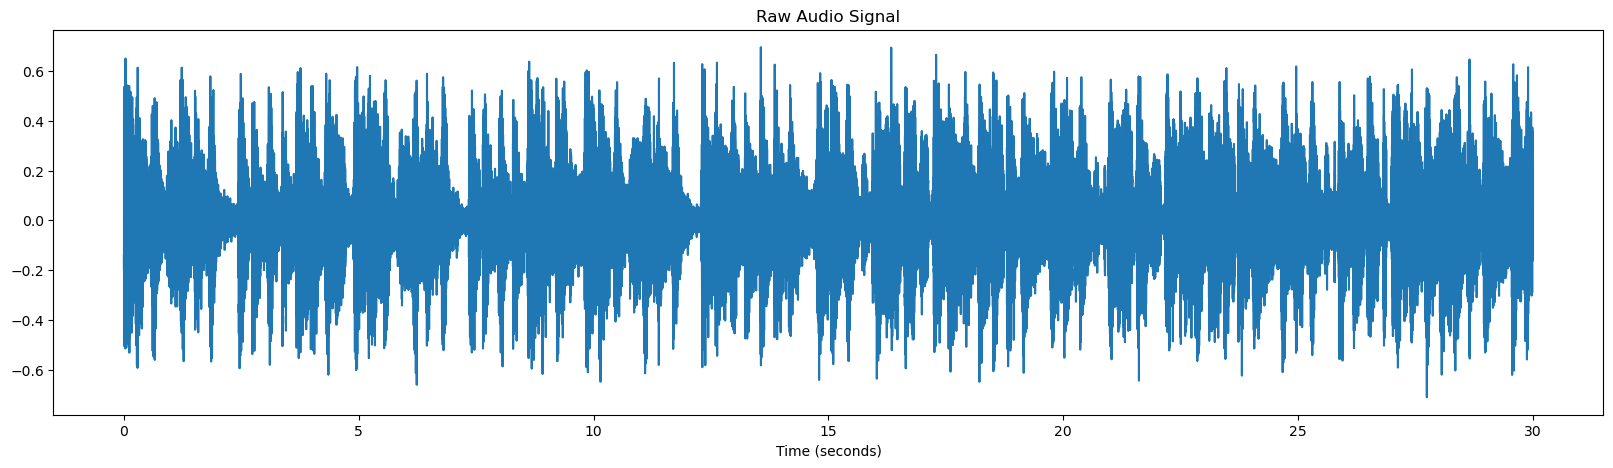

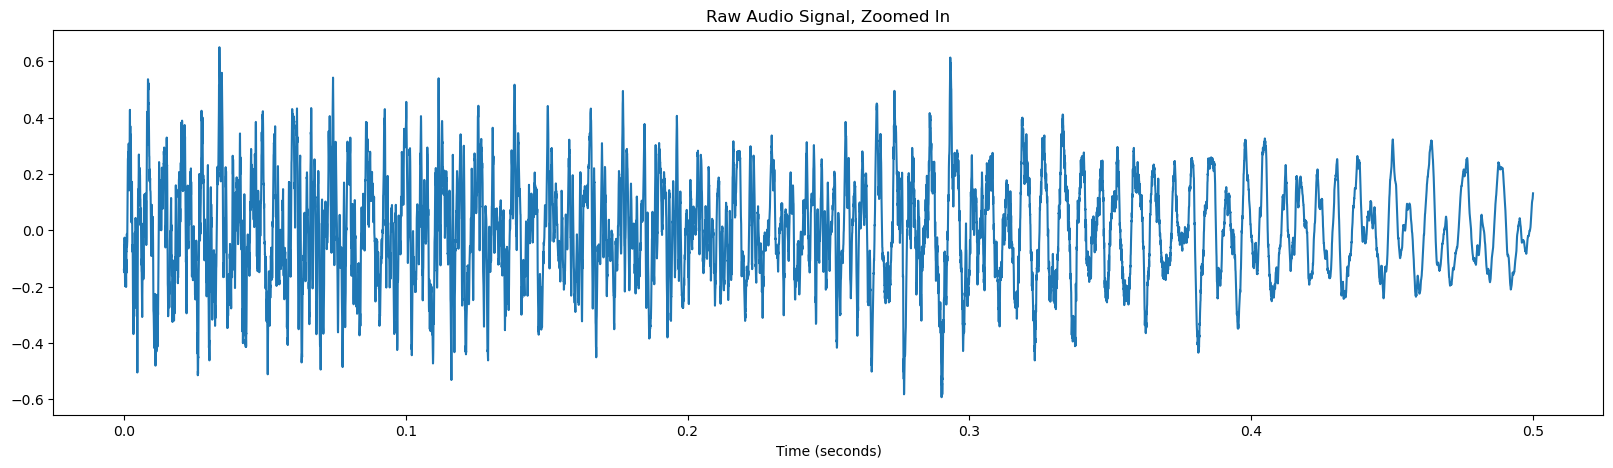

In [27]:
time_data = pd.Series(y)
time_seconds = [x/sr for x in range(y.shape[0])]

plt.figure(figsize=(20,5), linewidth=.05)
plt.title("Raw Audio Signal")
plt.xlabel("Time (seconds)")
plt.plot(time_seconds, time_data)
plt.savefig("./visualizations/raw-audio-signal-time-series")
plt.show()

plt.figure(figsize=(20,5), linewidth=.05)
plt.title("Raw Audio Signal, Zoomed In")
plt.xlabel("Time (seconds)")
plt.plot(time_seconds[:sr//2], time_data[:sr//2])
plt.savefig("./visualizations/raw-audio-signal-time-series-zoomed")
plt.show()

# Frequency-Domain Song Representations

## Fourier Transform

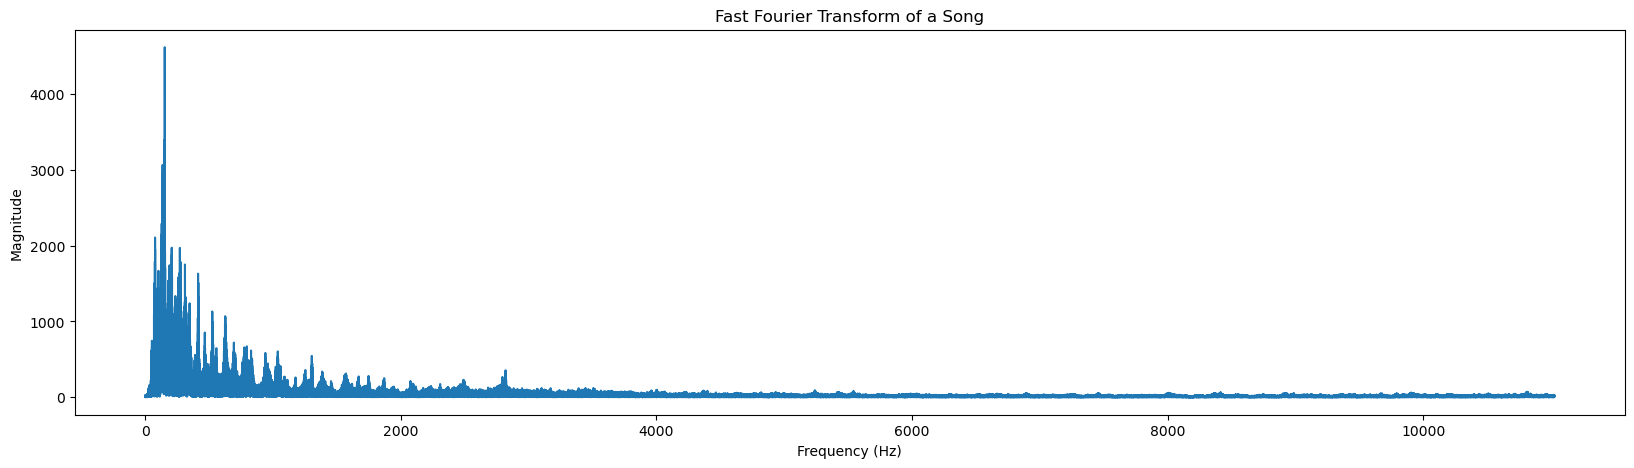

In [37]:
fft = np.fft.fft(y)
magnitude = np.abs(fft)
mag_db = librosa.amplitude_to_db(np.abs(magnitude), ref=np.max)
frequency = np.linspace(0, sr, len(magnitude))

left_frequency = frequency[:int(len(frequency)/2)]
left_magnitude = magnitude[:int(len(frequency)/2)]

plt.figure(figsize=(20,5), linewidth=.05)
plt.title("Fast Fourier Transform of a Song")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.plot(left_frequency, left_magnitude)
plt.savefig("./visualizations/fast-fourier-transform")
plt.show()

## Spectrogram

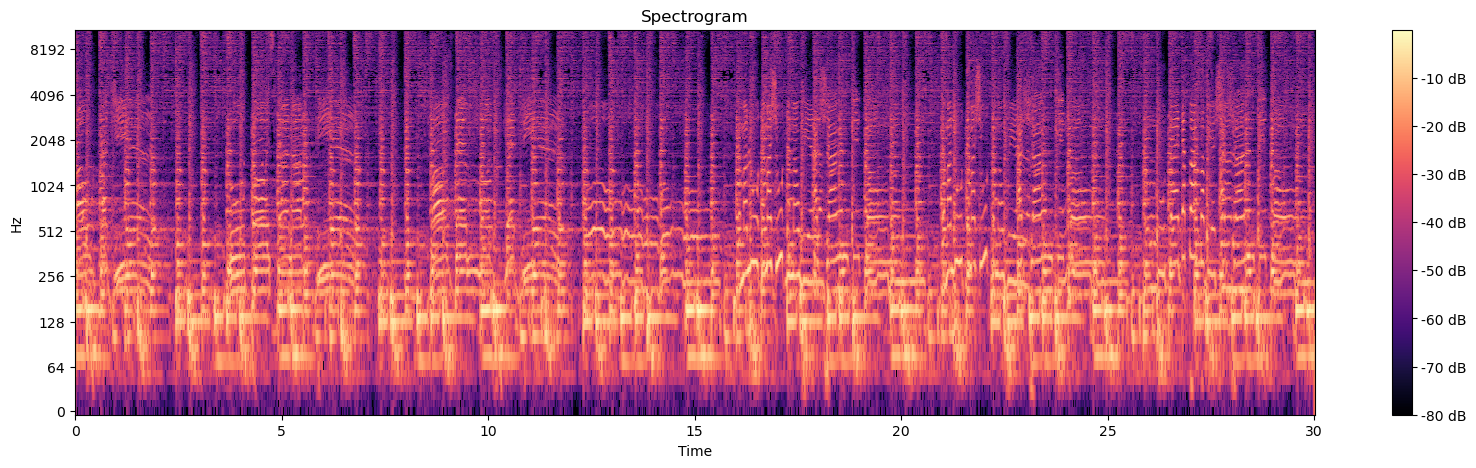

In [30]:
# compute the short-time Fourier transform of the audio signal
D = librosa.stft(y)

# convert the amplitude to decibels
Db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

fig, ax = plt.subplots(figsize=(20, 5))
img = librosa.display.specshow(Db, x_axis='time', y_axis='log', sr=sr, ax=ax)
ax.set_title('Spectrogram Example')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.savefig("./visualizations/song-spectrogram")
plt.show()

## Mel Spectrogram

The mel spectrogram, based on the auditory-based mel-frequency scale, provides better resolution for lower frequencies than the normal spectrogram

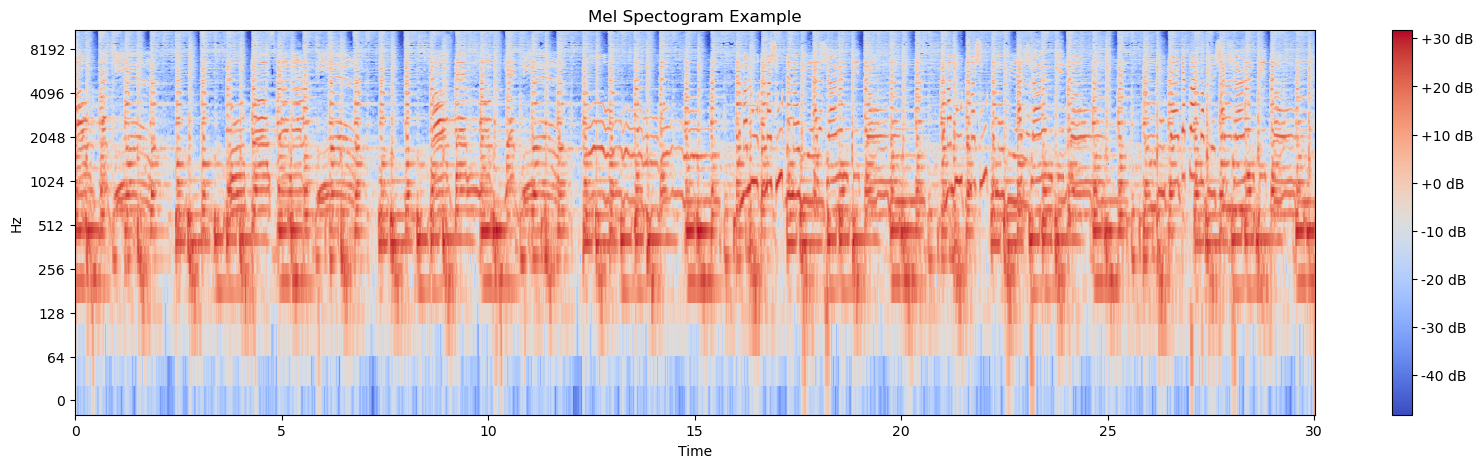

In [34]:
mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128 * 2)
mel_spec_db = librosa.power_to_db(mel_spec)

fig, ax = plt.subplots(figsize=(20, 5))
# Plot the mel spectogram
img = librosa.display.specshow(mel_spec_db,x_axis='time',y_axis='log',ax=ax)
ax.set_title('Mel Spectogram Example')
fig.colorbar(img, ax=ax, format="%+2.0f dB")
plt.savefig("./visualizations/song-mel-spectrogram")
plt.show()